

# Project: Dataset Investigation using Exploratory Data Analysis & Wrangling 

## Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset used for the analysis comprises of a number of variables associated to movies (released 1960-2015) such as :
* run time
* genre
* revenue
* budget 
* release year
* cast etc.

> I've explored how these variables impact one another and check if at all there are any hidden trends/associations.

> Some of the questions that could be uncovered by this analysis are:
*  Is there a trend in the no. of movies made each year
*  How much revenue has been generated by the respective genres:Thriller,Romance,Drama,Comedy,Horror, War until now  
*  Spread of dataset variables (runtime, popularity) over the years
*  Relation between revenue and other correlated dataset variables 

In [156]:
import pandas as pd 
import csv # to read and/or write csv files
from datetime import datetime # to perform operations related to date
import matplotlib.pyplot as plt
% matplotlib inline

In [215]:
df=pd.read_csv('tmdb-movies.csv')
# quicklook of the original dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='wrangling'></a>
## Data Wrangling

> This section includes checks for data quality followed by trimming and cleaning of the selected dataset for analysis. 


### Data Overview

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### No. of rows & columns in the Dataset:


In [10]:
df.shape

(10866, 21)

Rows: 10866
Columns: 21

### The snippet below shows certain descriptive statistics regarding each column:

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Check for Duplicate Entry

In [33]:
# returns total no of duplicate entries
sum(df.duplicated())

1

In [37]:
# eliminates duplicate entries
df.drop_duplicates(inplace=True)

### Duplicate Entry eliminated

In [38]:
# returns total no of duplicate entries after elimination 
sum(df.duplicated())

0

### Null Value Check

In [40]:
# return total no. of null values present in each field of the dataset 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Imdb_id, cast,director,tagline,overview,genres,production_companies have null values. 

Of which only 'imdb_id' is significant for the data analysis. Hence I will address the null value issue relative to only imdb_id and ignore the rest of the fields.

### Elimination of the rows corresponding to the null values in 'imdb_id' is chosen because after elimination more than 98% of data is still available for analysis.


# dropping null value entries 
df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

In [43]:
# null values entries in imdb_id have been eliminated 
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  40
tagline                 2817
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Steps Undertaken to Trim and Clean the Data after data overview
* Eliminated Duplicate Entries
* Eliminated Null Values ( Null values only in relevant fields such as     imdb_id were elimanted, the rest of the fields aren't relevant to our     analysis )
* Data types have not been altered as they are appropriately set for each   field in the dataset


<a id='eda'></a>
## Exploratory Data Analysis (Reserach)

### Does a trend in the no. of movies made each year exist ?


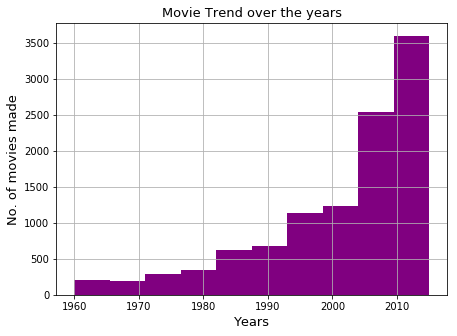

In [202]:
# creates a historgram that accounts the no. of movies made each year
df['release_year'].hist(figsize=(7,5),color='purple')
plt.xlabel('Years',fontsize=13)
plt.ylabel('No. of movies made',fontsize=13)
plt.title('Movie Trend over the years',fontsize=13);

* The above histogram shows an increasing trend in the no. of movies made each year

### Who are the directors with the most no. of movies in the past 55 years ?

In [145]:
df['director'].value_counts().nlargest(5)

Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
Name: director, dtype: int64

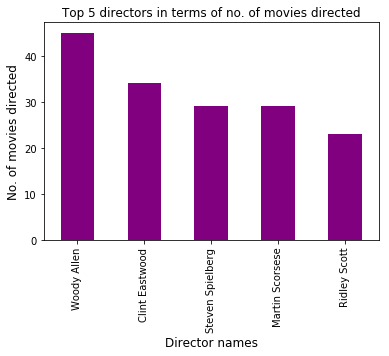

In [155]:
# displays the top 5 director with the highest no. of movies directed in the year range (1960-2015)
df['director'].value_counts().nlargest(5).plot(kind='bar', color='purple')
plt.xlabel('Director names',fontsize=12)
plt.ylabel('No. of movies directed', fontsize=12)
plt.title('Top 5 directors in terms of no. of movies directed');

### What is the revenue contribution in terms of genres ?

#### The following data frame only accounts for movies with singular genre ( eg. Genre: Comedy is included, Genre: Comedy | Family is excluded )


In [206]:
# creates new data frame that contains data regarding selected genres 
df_genres=df[(df['genres']=='Horror') | (df['genres']=='Drama') | (df['genres']=='Comedy') | (df['genres']=='Thriller') | (df['genres']=='Romance') |(df['genres']=='War')   ]

In [203]:
df_genres['genres'].value_counts()
# gives the no. of movies across each singular genre 

Drama       712
Comedy      711
Horror      253
Thriller     93
Romance       9
War           5
Name: genres, dtype: int64

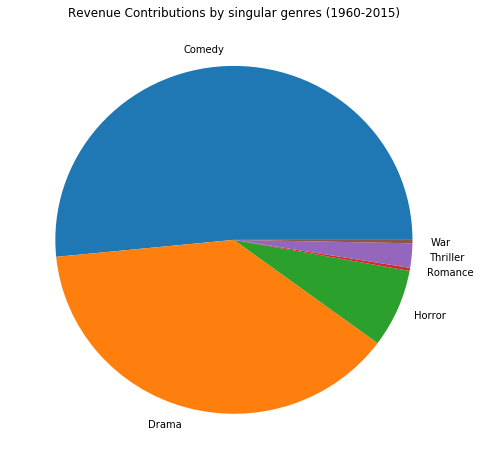

In [205]:
# displays a pie-chart for the movies grouped by genres
df_genres_grouped=df_genres.groupby('genres')
df_genres_grouped['revenue'].sum().plot(kind='pie',figsize=(8,8))
plt.title('Revenue Contributions by singular genres (1960-2015)')
plt.ylabel('');

In [207]:
df_genres_grouped['revenue'].sum()
#aggregates the revenue amount for all movies across each genres

genres
Comedy      20323889661
Drama       15107533347
Horror       2862149668
Romance       109161589
Thriller      893147815
War           123804635
Name: revenue, dtype: int64

* We see that the Genre:Comedy has the highest total revenue contribution amongst the 5 genres with 20.3 Billion dollards followed by Drama (15.1B) and so on.

## Data Spread for data set variables (Runtime and Popularity)

### Runtime Spread

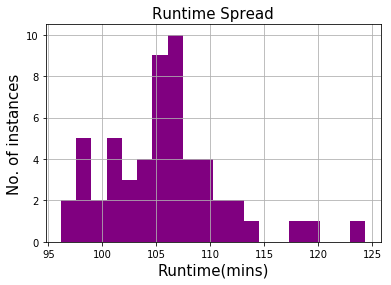

In [211]:
# a new data frame is formed with the data grouped by release year
df_grouped=df.groupby('release_year').mean()
df_grouped['runtime'].hist(color='purple',bins=20)
plt.xlabel('Runtime(mins)',fontsize=15)
plt.ylabel('No. of instances',fontsize=15)
plt.title('Runtime Spread',fontsize=15);

* The histogram above shows that most no. of movies had an average run time range of 101-107 mins 

### Popularity Spread

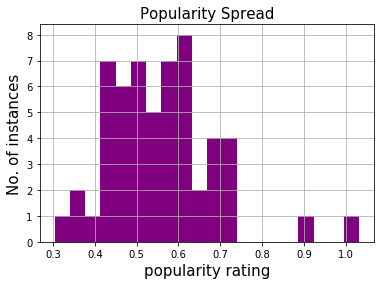

In [210]:
df_grouped['popularity'].hist(color='purple',bins=20)
plt.xlabel('popularity rating',fontsize=15)
plt.ylabel('No. of instances',fontsize=15)
plt.title('Popularity Spread',fontsize=15);

* The histogram above shows that most no. of movies had a average populaity rating range of 0.41-0.62.



### Evaluating Relationships of Dataset variables with one another. 

In [123]:
# the function used returns correlation co-efficients for numeric dataset variables
df_grouped.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026,-0.731797,0.891925,-0.158415
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243,-0.706442,0.767164,0.074952
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.731797,-0.706442,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.891925,0.767164,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.158415,0.074952,0.300077,-0.215568,0.377204,0.050086,1.000000


#### Using the above matrix as reference we will be considering variable pairs that signify useful relationships based on correlation coefficient scores. 

* Revenue vs Budget ( Plot 1 )
* Revenue vs Popularity ( Plot 2 )
* Revenue vs Runtime ( Plot 3 )

### Plot 1

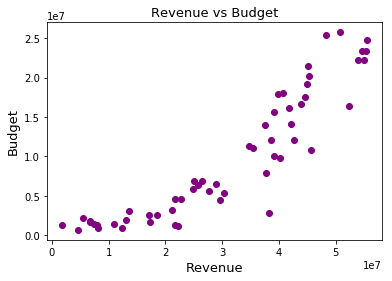

In [134]:
# displays the relationship between revenue and budget via a scatterplot
plt.scatter(x=df_grouped['revenue'], y=df_grouped['budget'],color='purple')
plt.xlabel('Revenue',fontsize=13)
plt.ylabel('Budget',fontsize=13)
plt.title('Revenue vs Budget',fontsize=13);

### Plot 2

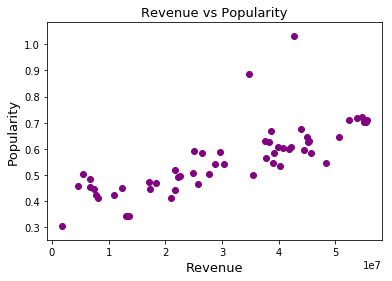

In [131]:
plt.scatter(x=df_grouped['revenue'], y=df_grouped['popularity'],color='purple')
plt.xlabel('Revenue',fontsize=13)
plt.ylabel('Popularity',fontsize=13)
plt.title('Revenue vs Popularity',fontsize=13);

### Plot 3

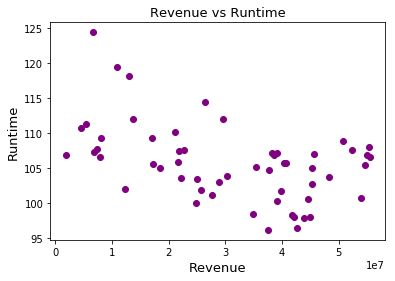

In [132]:
plt.scatter(x=df_grouped['revenue'], y=df_grouped['runtime'],color='purple')
plt.xlabel('Revenue',fontsize=13)
plt.ylabel('Runtime',fontsize=13)
plt.title('Revenue vs Runtime',fontsize=13);

<a id='conclusions'></a>
## Conclusions 
* Plot 1 signifies that budget and revenue and positively correlated meaning higher budget films are more likely to generate higher revenues and vice-versa.
* Plot 2 signifies that revenue tends to increase with respect to popularity rating and has a positive direct correlation.
* However, in case of plot 3 revenue tends to decrease as run time increases meaning a negative correlation relationship exists between the two variables.
* We also notice that the no. of movies being made every year is increasing at a high rate.
* The histogram plots shows the popular runtimes and and the most occcuring popularity rating.  
### Limitations: 
    * In case of the relationship scatter plots we are unable to determine the numeric relationship between variables for eg. We cannot yet determine whether how much will revenue increase with 'x' unit increase in budget or popularity rating. For which advanced concepts like regression is required.
    * The analysis is purely based on numeric variables and overlooks possible connection of target variable such as revenue with variables such as cast or production companies. 
   


In [214]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255